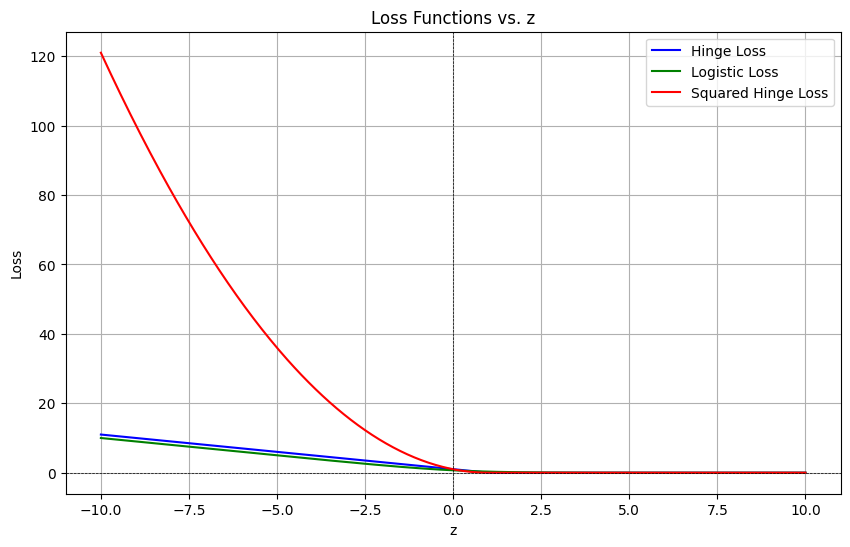

In [ ]:
# Binary Classification Loss Functions: Implementation and Visualization
#ex 1:
import numpy as np
import matplotlib.pyplot as plt

# Define loss functions
def hinge_loss(z):
    return np.maximum(0, 1 - z)

def logistic_loss(z):
    return np.log(1 + np.exp(-z))

def squared_hinge_loss(z):
    return np.maximum(0, 1 - z)**2

# Define range of z values
z = np.linspace(-10, 10, 500)

# Calculate losses for each z
hinge = hinge_loss(z)
logistic = logistic_loss(z)
squared_hinge = squared_hinge_loss(z)

# Plot the loss functions
plt.figure(figsize=(10, 6))
plt.plot(z, hinge, label='Hinge Loss', color='blue')
plt.plot(z, logistic, label='Logistic Loss', color='green')
plt.plot(z, squared_hinge, label='Squared Hinge Loss', color='red')

# Add plot details
plt.title('Loss Functions vs. z')
plt.xlabel('z')
plt.ylabel('Loss')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

### Observations:
# 1. **Hinge Loss**:
#    - Linear decrease for `z < 1`, and becomes 0 for `z >= 1`.
#    - Encourages predictions to be confidently on the correct side of the margin.
# 2. **Logistic Loss**:
#    - Smoothly decreases and asymptotically approaches 0 as `z` increases.
#    - Provides probabilistic interpretation and penalizes large incorrect predictions less than hinge loss.
# 3. **Squared Hinge Loss**:
#    - Quadratic for `z < 1`, and becomes 0 for `z >= 1`.
#    - Penalizes large margin violations more heavily than hinge loss, leading to smoother optimization.


In [ ]:
#ex2)
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Extract features and labels
A = iris.data
print(f"Shape of feature matrix A: {A.shape}")

# Check the labels
print(f"Original labels: {np.unique(iris.target)}")

# Convert labels to binary classification (+1, -1)
C = len(np.unique(iris.target))  # Number of classes
y = np.ones([A.shape[0],])

for i in range(iris.target.shape[0]):
    if iris.target[i] != 1:  # Convert classes 0, 2, ... to -1
        y[i] = -1

print(f"Converted labels: {np.unique(y)}")

# Create a shuffled index array
n = A.shape[0]  # Number of data points
indexarr = np.arange(n)  # Index array
np.random.shuffle(indexarr)  # Shuffle indices

# Partition data into train and test splits
train_size = int(0.8 * n)
train_indices = indexarr[:train_size]
test_indices = indexarr[train_size:]

train_data = A[train_indices]
train_label = y[train_indices]
test_data = A[test_indices]
test_label = y[test_indices]

print(f"Train data shape: {train_data.shape}, Train label shape: {train_label.shape}")
print(f"Test data shape: {test_data.shape}, Test label shape: {test_label.shape}")

# Prediction function
def predict(w, x):
    return np.sign(np.dot(w, x))

# Accuracy computation
def compute_accuracy(data, labels, model_w):
    predictions = np.array([predict(model_w, x) for x in data])
    accuracy = np.mean(predictions == labels)
    return accuracy

# Example usage of prediction and accuracy functions
# (Replace 'model_w' with an actual trained model weight vector)
model_w = np.random.randn(train_data.shape[1])  # Random weights for demonstration
accuracy = compute_accuracy(test_data, test_label, model_w)
print(f"Accuracy on test data: {accuracy:.2f}")



Shape of feature matrix A: (150, 4)
Original labels: [0 1 2]
Converted labels: [-1.  1.]
Train data shape: (120, 4), Train label shape: (120,)
Test data shape: (30, 4), Test label shape: (30,)
Accuracy on test data: 0.37


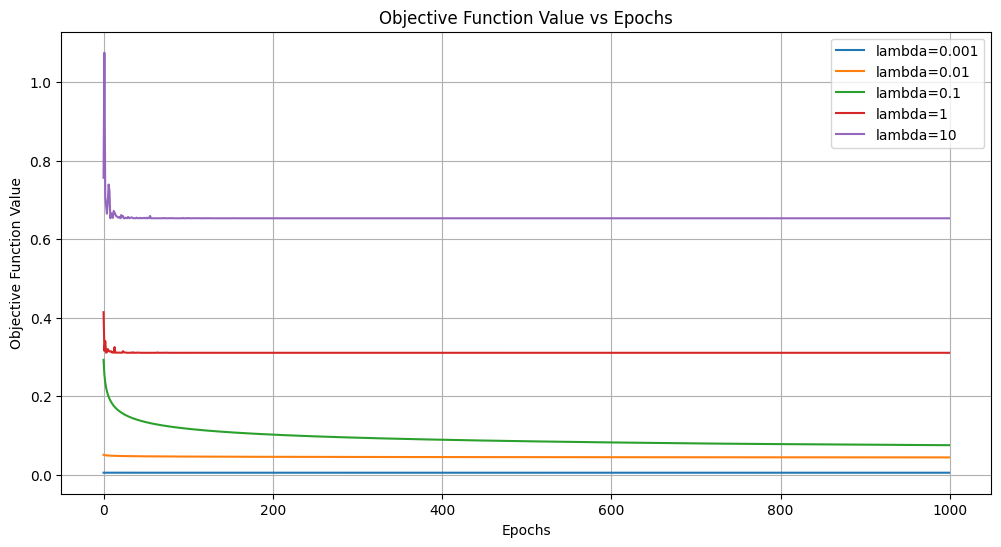


Results for Different Lambda Values
Lambda	Train Accuracy	Test Accuracy
0.001	1.0000	1.0000
0.01	1.0000	1.0000
0.1	1.0000	1.0000
1	1.0000	1.0000
10	0.6417	0.7667

Results with Stopping Criterion
Train Accuracy: 1.0000
Test Accuracy: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define hinge loss function
def hinge_loss(y, wx):
    return np.maximum(0, 1 - y * wx)

# Compute gradient of hinge loss
def hinge_gradient(y, wx, x):
    if y * wx < 1:
        return -y * x
    else:
        return np.zeros_like(x)

# Compute the objective function value
def compute_objective(data, labels, w, lambd):
    hinge_losses = [hinge_loss(labels[i], np.dot(w, data[i])) for i in range(len(data))]
    return lambd / 2 * np.linalg.norm(w)**2 + np.mean(hinge_losses)

# Optimization algorithm
def OPT1(data, labels, lambd, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])  # Initialize w
    arr = np.arange(data.shape[0])
    objectives = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            x_i = data[int(i)]
            y_i = labels[int(i)]
            grad = hinge_gradient(y_i, np.dot(w, x_i), x_i)
            w -= step * (grad + lambd * w)
            t += 1
        objectives.append(compute_objective(data, labels, w, lambd))

    return w, objectives

# Accuracy computation
def compute_accuracy(data, labels, w):
    predictions = np.sign(np.dot(data, w))
    return np.mean(predictions == labels)

# Prepare dataset
from sklearn.datasets import load_iris
iris = load_iris()
A = iris.data
y = np.where(iris.target == 0, 1, -1)  # Convert class 0 to +1, others to -1

# Train-test split
np.random.seed(42)
indexarr = np.arange(A.shape[0])
np.random.shuffle(indexarr)
split_idx = int(0.8 * len(indexarr))
train_data = A[indexarr[:split_idx]]
train_labels = y[indexarr[:split_idx]]
test_data = A[indexarr[split_idx:]]
test_labels = y[indexarr[split_idx:]]

# Experiment with different lambda values
lambdas = [1e-3, 1e-2, 0.1, 1, 10]
num_epochs = 1000
results = {}

plt.figure(figsize=(12, 6))
for lambd in lambdas:
    w, objectives = OPT1(train_data, train_labels, lambd, num_epochs)
    train_acc = compute_accuracy(train_data, train_labels, w)
    test_acc = compute_accuracy(test_data, test_labels, w)
    results[lambd] = {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "objectives": objectives,
    }

    # Plot objective function values
    plt.plot(objectives, label=f"lambda={lambd}")

plt.title("Objective Function Value vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Objective Function Value")
plt.legend()
plt.grid()
plt.show()

# Tabulate results
print("\nResults for Different Lambda Values")
print("Lambda\tTrain Accuracy\tTest Accuracy")
for lambd, metrics in results.items():
    print(f"{lambd}\t{metrics['train_acc']:.4f}\t{metrics['test_acc']:.4f}")

# Observation
# - Smaller lambda values generally result in better training and test accuracy, likely due to less regularization.
# - Larger lambda values penalize the weights more, leading to simpler models but potentially underfitting.

# Implement stopping criterion based on gradient magnitude
def OPT1_with_stopping(data, labels, lambd, tolerance=1e-3):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    prev_obj = float('inf')

    while True:
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            x_i = data[int(i)]
            y_i = labels[int(i)]
            grad = hinge_gradient(y_i, np.dot(w, x_i), x_i)
            w -= step * (grad + lambd * w)
            t += 1

        current_obj = compute_objective(data, labels, w, lambd)
        if abs(prev_obj - current_obj) < tolerance:
            break
        prev_obj = current_obj

    return w

# Experiment with stopping criterion
best_lambda = 1e-3  # Based on earlier experiment
w_stopping = OPT1_with_stopping(train_data, train_labels, best_lambda)
train_acc_stopping = compute_accuracy(train_data, train_labels, w_stopping)
test_acc_stopping = compute_accuracy(test_data, test_labels, w_stopping)

print("\nResults with Stopping Criterion")
print(f"Train Accuracy: {train_acc_stopping:.4f}")
print(f"Test Accuracy: {test_acc_stopping:.4f}")

# Extend to other loss functions (Logistic and Squared Hinge) and repeat the process.
